# Problem Statement

An education company named X Education sells online courses to industry professionals.The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted.
What you need to do?

- X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers
- The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance

Steps that will be followed to approach this problem are:
1. Reading the data
2. Data Cleaning
3. Data Preparation
4. Model Building
5. Results

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score, confusion_matrix, precision_recall_curve

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## 1. Reading the Data

In [3]:
leads = pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
leads.shape

(9240, 37)

In [5]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## 2. Data Cleaning

In [7]:
# Checking percentage of missing values for all the columns
round(100*(leads.isnull().sum()/len(leads.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [8]:
# Replacing 'Select' with all missing values
leads = leads.replace('Select', np.NaN)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [9]:
# Dropping all the score variables
leads.drop(['Tags', 'Lead Profile', 'Lead Quality','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index', 'Asymmetrique Profile Score'], axis=1, inplace=True)
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [10]:
# Checking percentage of missing values for after dropping the score variables and replacing 'Select' with NaN
round(100*(leads.isnull().sum()/len(leads.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [11]:
# Selecting data that have less than 40% of missing values
leads = leads.loc[:,leads.isnull().mean() <= .4]

In [12]:
# Checking the percentage of missing values for the remaining columns again
round(100*(leads.isnull().sum()/len(leads.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

From the above we can see we have certain variables that still have significant percentage of missing values
We will check whether these categorical variables are highly skewed or not and drop them accordingly. Also we will check the business aspect as well whether a particular variable gives us any informational value or patterns that we can get insights. For example the variable `City` can be dropped because, this course is offered online and does cater to people globally, city does not give much information. So we will drop this column

In [13]:
# Dropping the column City as this course is offered online and caters to people globally
leads.drop('City', axis=1, inplace=True)
# Checking the columns
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [14]:
# Checking for skewness (imbalance) of categorical variables with high missing value percentage from the remaining columns
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

We can clearly see that this column is skewed as one category has more observations (~ 99%). So we will go ahead and drop this column

In [15]:
leads.drop('What matters most to you in choosing a course', axis=1, inplace=True)
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [16]:
leads.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

For the above column as well, we can see that most of the students are from India and `Country` is also highly skewed. We will drop this column

In [17]:
leads.drop('Country', axis=1, inplace=True)
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [18]:
leads.Specialization.value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [19]:
# We cannot drop Specialization, because it is not skewed and this column is important. We will impute the null values with 'Unknown'
leads.Specialization.fillna("Unknown", inplace=True)

In [20]:
leads['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [21]:
# Grouping lower % values into Others
col_names=['Working Professional','Student','Housewife','Businessman']
leads['What is your current occupation'] = leads['What is your current occupation'].replace(col_names, "Other")

In [22]:
# We cannot drop this column as it is important and has missing values.We will impute the missing values of this column with 'Others'
leads['What is your current occupation'].fillna("Missing", inplace=True)

In [23]:
leads['What is your current occupation'].value_counts()

Unemployed    5600
Missing       2690
Other          950
Name: What is your current occupation, dtype: int64

In [24]:
# Checking to see if this column is skewed
leads['I agree to pay the amount through cheque'].value_counts()

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [25]:
# Dropping the column as it is skewed
leads.drop(['I agree to pay the amount through cheque'], axis=1, inplace=True)

In [26]:
# Checking to see if this column is skewed
leads['Get updates on DM Content'].value_counts()

No    9240
Name: Get updates on DM Content, dtype: int64

In [27]:
# Dropping the column as it is skewed
leads.drop(['Get updates on DM Content'], axis=1, inplace=True)

In [28]:
# Checking to see if this column is skewed
leads['Update me on Supply Chain Content'].value_counts()

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [29]:
# Dropping the column as it is highly skewed
leads.drop(['Update me on Supply Chain Content'], axis=1, inplace=True)

In [30]:
leads['Receive More Updates About Our Courses'].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [31]:
leads.drop(['Receive More Updates About Our Courses'], axis=1, inplace=True)

In [32]:
leads['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [33]:
leads.drop(['Through Recommendations'], axis=1, inplace=True)

In [34]:
leads['Digital Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [35]:
leads.drop('Digital Advertisement', axis=1, inplace=True)

In [36]:
leads.Newspaper.value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [37]:
leads.drop('Newspaper', axis=1, inplace=True)

In [38]:
leads['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [39]:
leads.drop('X Education Forums', axis=1, inplace=True)

In [40]:
leads['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [41]:
leads.drop('Newspaper Article', axis=1, inplace=True)

In [42]:
leads.Magazine.value_counts()

No    9240
Name: Magazine, dtype: int64

In [43]:
leads.drop('Magazine', axis=1, inplace=True)

In [44]:
leads.Search.value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

In [45]:
leads.drop('Search', axis=1, inplace=True)

In [46]:
leads['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [47]:
leads.drop('Do Not Email', axis=1, inplace=True)

In [48]:
leads['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [49]:
leads.drop('Do Not Call', axis=1, inplace=True)

In [50]:
leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [51]:
# Since Lead Source has many values, we will group certain values that are in less percentage into a value called 'Others'
col_names = ['Welingak Website', 'Referral Sites', 'google',
       'Facebook', 'blog', 'Pay per Click Ads', 'bing',
       'Social Media', 'WeLearn', 'Click2call', 'Live Chat',
       'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release',
       'NC_EDM']
leads['Lead Source'] = leads['Lead Source'].replace(col_names, 'Others')

In [52]:
# We will replace the missing values of this column with the mode as the % of missing values is less
leads['Lead Source'].fillna(leads['Lead Source'].mode()[0], inplace=True)

In [53]:
leads['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [54]:
# We will group certain values of Last Activity that are in less percentage into a value called 'Others' 
col_names = ['Unsubscribed', 'Had a Phone Conversation', 'View in browser link Clicked', 'Others', 'Approached upfront',
             'Visited Booth in Tradeshow', 'Resubscribed to emails', 'Email Received', 'Email Marked Spam', 'Unreachable'
            'Email Bounced', 'Email Link Clicked', 'Page Visited on Website', 'Form Submitted on Website', 'Converted to Lead']
leads['Last Activity'] = leads['Last Activity'].replace(col_names, 'Others')

In [55]:
# We will replace the missing values with others and the last activity is an activity performed on the leads by the sales team
# We cannot replace it with mode as we do not know why any activity wasn't performed.
leads['Last Activity'].fillna('Others', inplace=True)

In [56]:
leads['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [57]:
col_names = ['Lead Add Form', 'Lead Import', 'Quick Add Form']
leads['Lead Origin'] = leads['Lead Origin'].replace(col_names, "Other")

In [58]:
# Changing the data type of 'A free copy of Mastering The Interview' from int64 to object since it is a categorical variable
leads['A free copy of Mastering The Interview'] = leads['A free copy of Mastering The Interview'].astype(str)

#### Outlier analysis and treating numerical variables

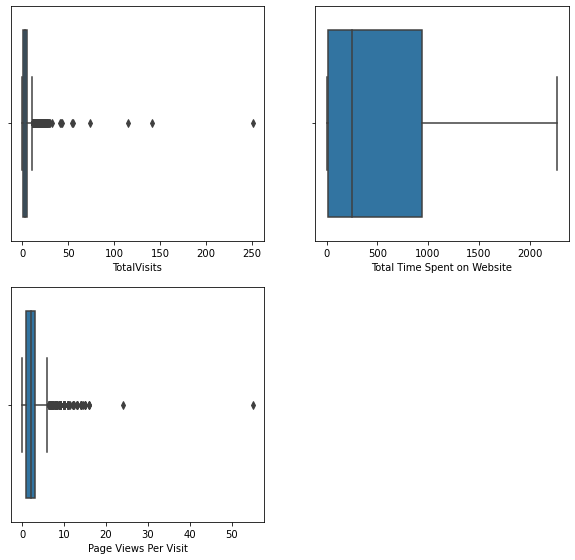

In [59]:
#Outlier Analysis, to find outlier 
feature=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
plt.figure(figsize = (10,25))

for i in enumerate(feature):
    plt.subplot(5,2, i[0]+1)
    sns.boxplot(leads[i[1]])

In [60]:
leads_outliers=leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
leads_outliers.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9240.000000,9103.000000
mean,3.445238,487.698268,2.362820
std,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


In [61]:
#Capping of Outliers

#Treating Large value of outliers for some columns exports,healths,D,total_fer,income as it makes sense that 
q4 = leads['TotalVisits'].quantile(0.99)

leads['TotalVisits'][leads['TotalVisits']>=q4]=q4


In [62]:
q4 = leads['Page Views Per Visit'].quantile(0.99)

leads['Page Views Per Visit'][leads['Page Views Per Visit']>=q4]=q4

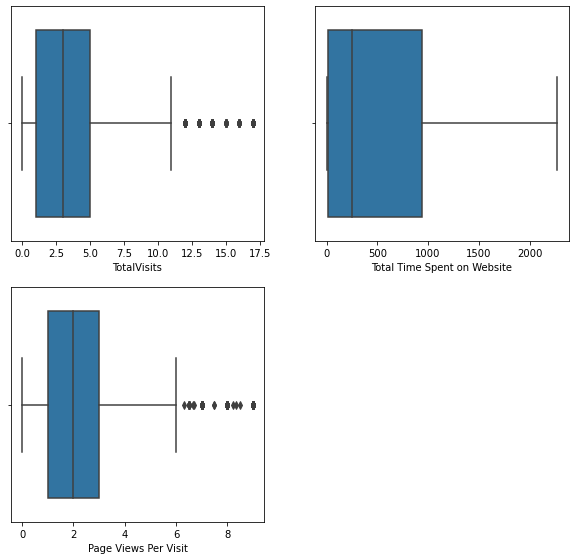

In [63]:
# Plotting again to check for outliers
feature=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
plt.figure(figsize = (10,25))

for i in enumerate(feature):
    plt.subplot(5,2, i[0]+1)
    sns.boxplot(leads[i[1]])

In [64]:
# Let us replace the missing values with median, since we still have outliers after capping as well
leads.loc[np.isnan(leads['TotalVisits']), ['TotalVisits']] = leads['TotalVisits'].median()
leads.loc[np.isnan(leads['Page Views Per Visit']), ['Page Views Per Visit']] = leads['Page Views Per Visit'].median()

In [65]:
# Checking the percentage of missing values
round(100*(leads.isnull().sum()/len(leads.index)),2)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [66]:
len(leads.index)/9240

1.0

Now that the missing values are treated and certain columns are dropped, we will go ahead with the remaining columns for modelling

## 3. Data Preparation

#### Converting binary variables (Yes/No) to 1/0

In [67]:
leads['A free copy of Mastering The Interview'] = leads['A free copy of Mastering The Interview'].map({'Yes': 1, 'No': 0})

In [68]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Others,Unknown,Unemployed,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Unknown,Unemployed,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Other,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Others,Unknown,Unemployed,0,Modified


#### Creating Dummy variables for categorical variables

In [69]:
# Creating dummy variables for the variable 'Lead Origin'
lo = pd.get_dummies(leads['Lead Origin'], prefix='Lead Origin')
#Adding the results to the master dataframe
lo.drop('Lead Origin_Other',axis=1,inplace=True)
leads = pd.concat([leads,lo], axis=1)


# Creating dummy variables for the variable 'Lead Source'.
ls = pd.get_dummies(leads['Lead Source'], prefix='Lead Source')
ls.drop('Lead Source_Others',axis=1,inplace=True)
leads = pd.concat([leads,ls], axis=1)

# Creating dummy variables for the variable 'Specialization'.
sp = pd.get_dummies(leads['Specialization'], prefix='Specialization')
sp.drop('Specialization_Unknown',axis=1,inplace=True)
# Adding the results to the master dataframe
leads = pd.concat([leads,sp], axis=1)

# Creating dummy variables for the variable 'What is your current occupation'. 
oc = pd.get_dummies(leads['What is your current occupation'], prefix='What is your current occupation')
oc.drop('What is your current occupation_Missing',axis=1,inplace=True)
# Adding the results to the master dataframe
leads = pd.concat([leads,oc], axis=1)

# Creating dummy variables for the variable 'Last Activity'. 
la = pd.get_dummies(leads['Last Activity'], prefix='Last Activity',drop_first=True)
# Adding the results to the master dataframe
leads = pd.concat([leads,la], axis=1)

In [70]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Other,What is your current occupation_Unemployed,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Last Activity_Unreachable
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Others,Unknown,...,0,0,0,0,1,0,0,1,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Unknown,...,0,0,0,0,1,1,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,...,0,0,0,1,0,1,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,...,0,0,0,0,1,0,0,0,0,1
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Others,Unknown,...,0,0,0,0,1,0,0,1,0,0


In [71]:
# Dropping the original variables since dummies are created
leads.drop('Lead Origin', axis=1, inplace=True)
leads.drop('Lead Source', axis=1, inplace=True)
leads.drop('Specialization', axis=1, inplace=True)
leads.drop('What is your current occupation', axis=1, inplace=True)
leads.drop('Last Activity', axis=1, inplace=True)
# Checking the data
leads.head()

,Prospect ID,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_API,Lead Origin_Landing Page Submission,...,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Other,What is your current occupation_Unemployed,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Last Activity_Unreachable
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.0,0,0.0,0,Modified,1,0,...,0,0,0,0,1,0,0,1,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,674,2.5,0,Email Opened,1,0,...,0,0,0,0,1,1,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2.0,1532,2.0,1,Email Opened,0,1,...,0,0,0,1,0,1,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1.0,305,1.0,0,Modified,0,1,...,0,0,0,0,1,0,0,0,0,1
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2.0,1428,1.0,0,Modified,0,1,...,0,0,0,0,1,0,0,1,0,0


## 4. Model Building

### Train-Test Split

In [72]:
# Putting the feature to X
X = leads.drop(['Prospect ID','Lead Number','Converted',
                 'Last Notable Activity'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Other,What is your current occupation_Unemployed,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Last Activity_Unreachable
0,0.0,0,0.0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
1,5.0,674,2.5,0,1,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
2,2.0,1532,2.0,1,0,1,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,1.0,305,1.0,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,2.0,1428,1.0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0


In [73]:
# Putting target variable to y
y=leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [74]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling


In [75]:
# Scaling the features
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Other,What is your current occupation_Unemployed,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Last Activity_Unreachable
1871,-1.022595,-0.885371,-1.180474,0,1,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
6795,0.205373,0.005716,-0.503379,1,0,1,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3516,0.512365,-0.691418,0.092260,0,1,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
8105,0.512365,1.365219,1.364995,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
3934,-1.022595,-0.885371,-1.180474,0,1,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0


### Correlation

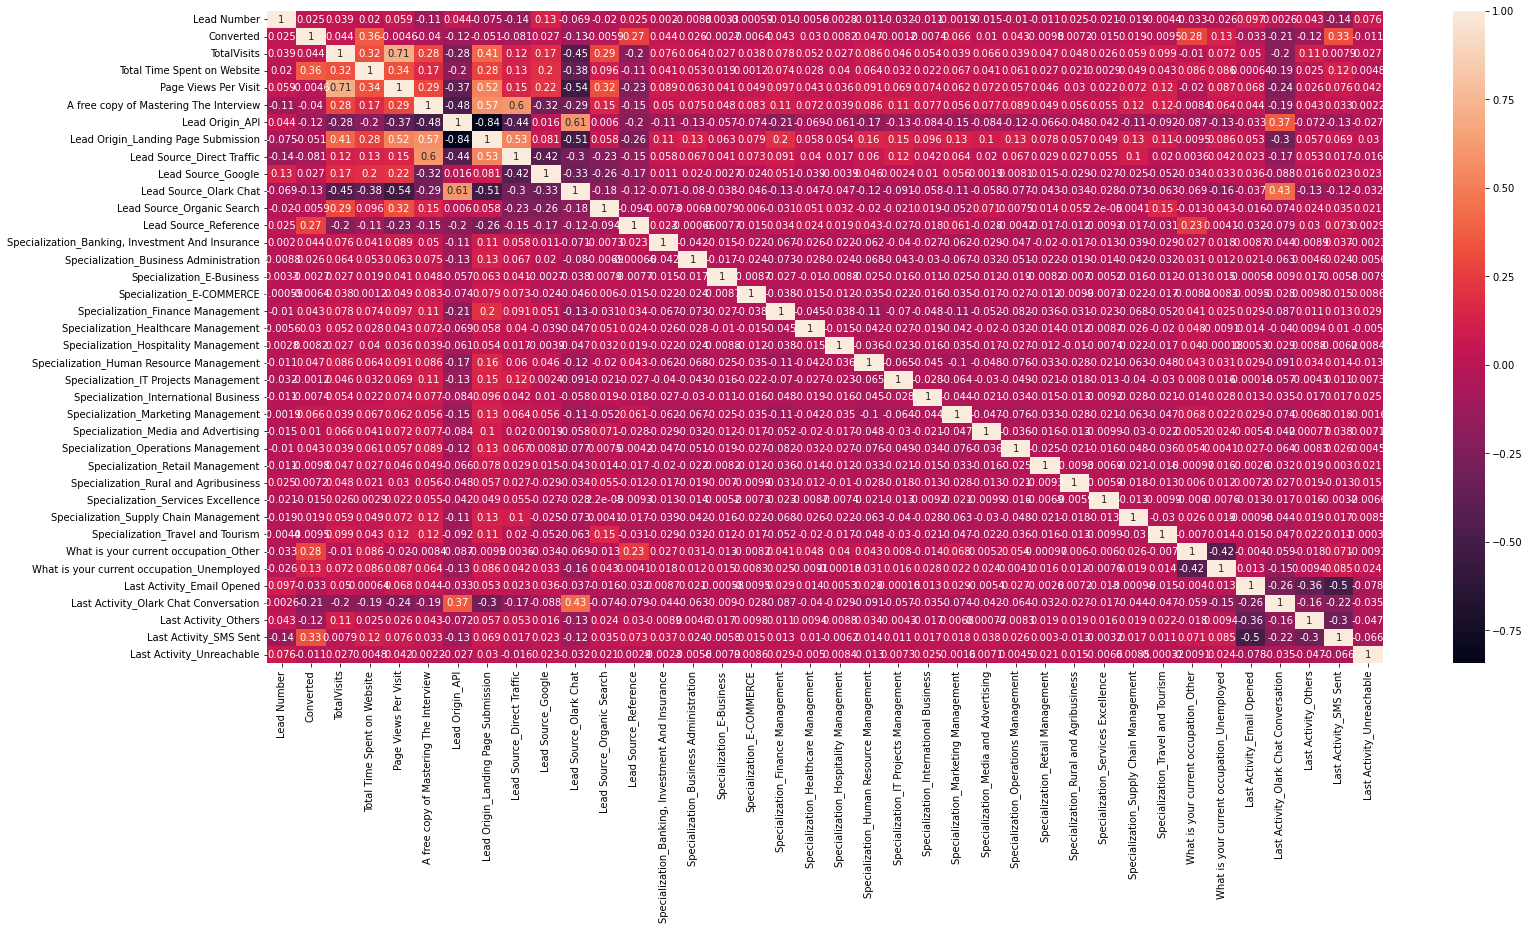

In [76]:
# Checking the correlation of the variables
plt.figure(figsize = (25,12))        
sns.heatmap(leads.corr(),annot = True)
plt.show()

In [77]:
# Dropping variables that are highly correlated to each other
X_train = X_train.drop(['Lead Origin_Landing Page Submission'], axis=1)
X_test=X_test.drop(['Lead Origin_Landing Page Submission'], axis=1)

In [78]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,...,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Other,What is your current occupation_Unemployed,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Last Activity_Unreachable
1871,-1.022595,-0.885371,-1.180474,0,1,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
6795,0.205373,0.005716,-0.503379,1,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3516,0.512365,-0.691418,0.092260,0,1,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
8105,0.512365,1.365219,1.364995,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3934,-1.022595,-0.885371,-1.180474,0,1,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0


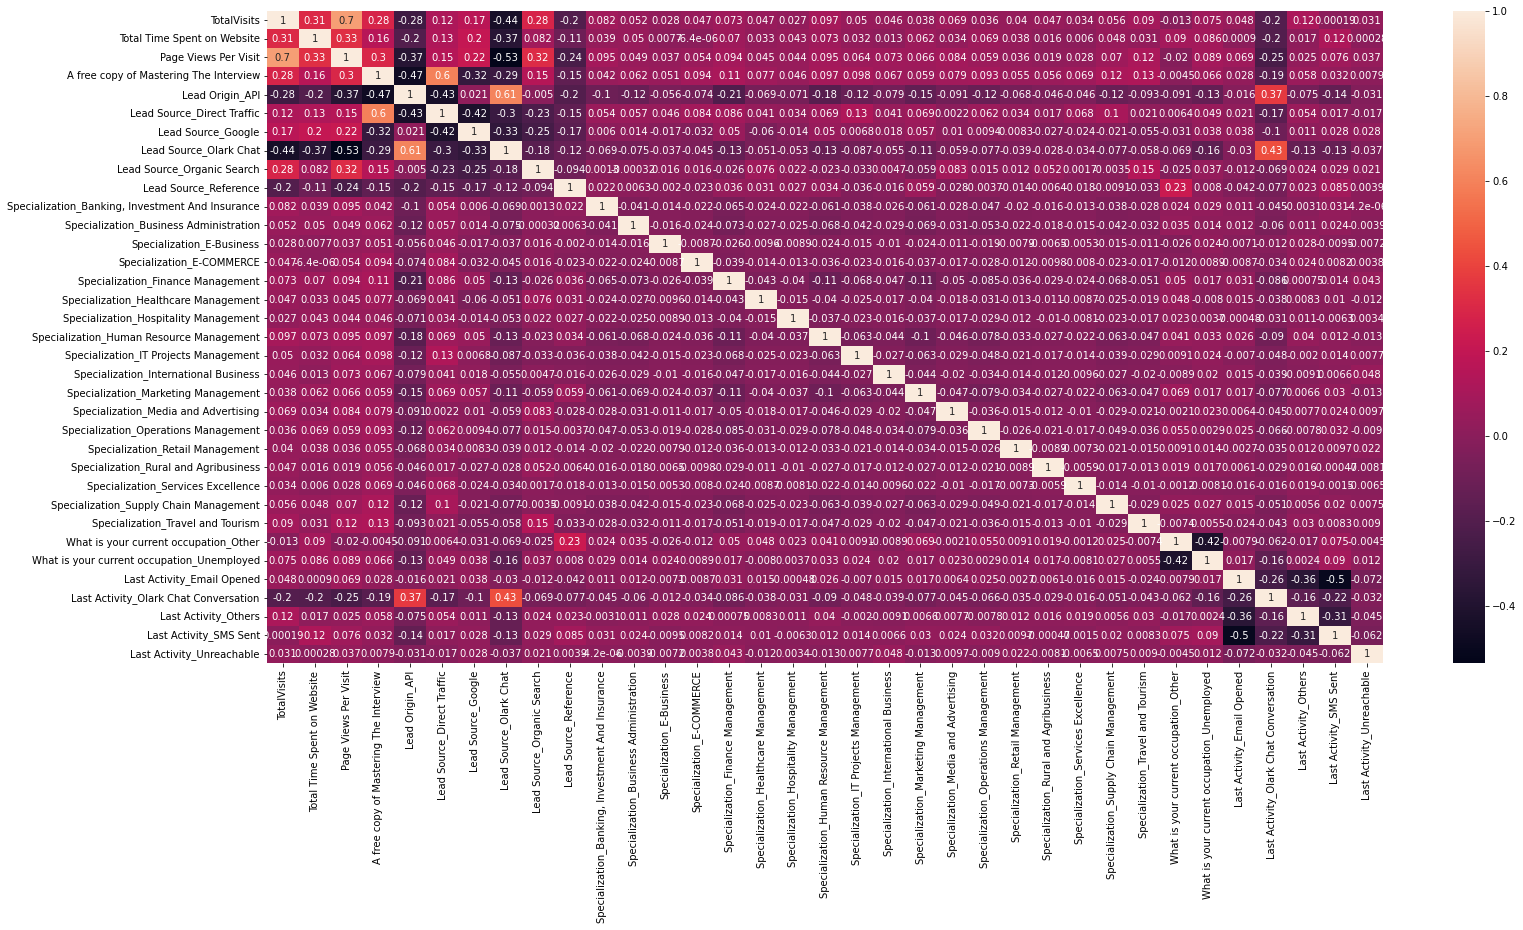

In [79]:
# Checking the correlation of the variables again after dropping highly correlated variables
plt.figure(figsize = (25,12))        
sns.heatmap(X_train.corr(),annot = True)
plt.show()

In [80]:
### Checking the converted Rate
converted_rate = (sum(leads['Converted'])/len(leads['Converted'].index))*100
converted_rate

38.53896103896104

### Feature Selection using RFE

In [81]:
logreg = LogisticRegression()
# Running RFE with 20 variables
rfe = RFE(logreg, 20)           
rfe = rfe.fit(X_train, y_train)

In [82]:
rfe.support_

array([False,  True, False, False, False,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True, False,
        True, False, False, False, False, False,  True, False, False,
       False,  True,  True,  True, False,  True,  True,  True])

In [83]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 8),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 7),
 ('A free copy of Mastering The Interview', False, 11),
 ('Lead Origin_API', False, 13),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Specialization_Banking, Investment And Insurance', True, 1),
 ('Specialization_Business Administration', False, 12),
 ('Specialization_E-Business', True, 1),
 ('Specialization_E-COMMERCE', True, 1),
 ('Specialization_Finance Management', True, 1),
 ('Specialization_Healthcare Management', True, 1),
 ('Specialization_Hospitality Management', True, 1),
 ('Specialization_Human Resource Management', False, 4),
 ('Specialization_IT Projects Management', True, 1),
 ('Specialization_International Business', False, 14),
 ('Specialization_Marketing Management', False, 3),
 ('Specialization_Media and Advertisi

In [84]:
col = X_train.columns[rfe.support_]

In [85]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Origin_API',
       'Specialization_Business Administration',
       'Specialization_Human Resource Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism',
       'Last Activity_Olark Chat Conversation'],
      dtype='object')

#### Building Model using statsmodels to get detailed summary of statistics

In [86]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2772.4
Date:                Mon, 02 Jan 2023   Deviance:                       5544.9
Time:                        23:36:53   Pearson chi2:                 6.38e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -2.2132      0.210    -10.526      0.000      -2.625      -1.801
Total Time Spent on Website                          1.0505      0.039     27.132      0.000       0.975       1.126
Lead Source_Direct Traffic                          -1.9944      0.166    -11.998      0.000      -2.320      -1.669
Lead Source_Google                                  -1.4449      0.161     -8.958      0.000      -1.761      -1.129
Lead Source_Olark Chat                              -0.3752      0.169     -2.216      0.027      -0.707      -0.043
Lead Source_Organic Search                          -1.6959      0.178     -9.525      0.000      -2.045      -1.347
Lead Source_Reference                                1.7370      0.242      7.164      0.000       1.262       2.212
Specialization_Banking, Investment And Insurance     0.2733      0.182      1.502      0.133      -0.083       0.630
Specialization_E-Business                            0.1964      0.439      0.447      0.655      -0.665       1.057
Specialization_E-COMMERCE                            0.4328      0.288      1.501      0.133      -0.133       0.998
Specialization_Finance Management                    0.2991      0.111      2.695      0.007       0.082       0.517
Specialization_Healthcare Management                 0.4301      0.267      1.612      0.107      -0.093       0.953
Specialization_Hospitality Management               -0.7986      0.310     -2.578      0.010      -1.406      -0.191
Specialization_IT Projects Management                0.2998      0.180      1.665      0.096      -0.053       0.653
Specialization_Rural and Agribusiness                0.4471      0.383      1.168      0.243      -0.303       1.197
What is your current occupation_Other                2.8606      0.141     20.322      0.000       2.585       3.136
What is your current occupation_Unemployed           1.2430      0.086     14.438      0.000       1.074       1.412
Last Activity_Email Opened                           1.5826      0.148     10.716      0.000       1.293       1.872
Last Activity_Others                                 0.8993      0.164      5.473      0.000       0.577       1.221
Last Activity_SMS Sent                               2.6964      0.151     17.878      0.000       2.401       2.992
Last Activity_Unreachable                            1.3658      0.384      3.555      0.000       0.613       2.119
====================================================================================================================
"""

In [87]:
# Since p-value for Specialization_E-Business is high, let us drop it and run the model again
col = col.drop(['Specialization_E-Business'], 1)
col

Index(['Total Time Spent on Website', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_IT Projects Management',
       'Specialization_Rural and Agribusiness',
       'What is your current occupation_Other',
       'What is your current occupation_Unemployed',
       'Last Activity_Email Opened', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Last Activity_Unreachable'],
      dtype='object')

In [88]:
# Let us re-run the model again
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2772.5
Date:                Mon, 02 Jan 2023   Deviance:                       5545.1
Time:                        23:36:53   Pearson chi2:                 6.38e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -2.2132      0.210    -10.526      0.000      -2.625      -1.801
Total Time Spent on Website                          1.0506      0.039     27.133      0.000       0.975       1.127
Lead Source_Direct Traffic                          -1.9915      0.166    -11.991      0.000      -2.317      -1.666
Lead Source_Google                                  -1.4436      0.161     -8.952      0.000      -1.760      -1.128
Lead Source_Olark Chat                              -0.3749      0.169     -2.215      0.027      -0.707      -0.043
Lead Source_Organic Search                          -1.6937      0.178     -9.517      0.000      -2.043      -1.345
Lead Source_Reference                                1.7398      0.242      7.178      0.000       1.265       2.215
Specialization_Banking, Investment And Insurance     0.2713      0.182      1.491      0.136      -0.085       0.628
Specialization_E-COMMERCE                            0.4304      0.288      1.493      0.136      -0.135       0.996
Specialization_Finance Management                    0.2972      0.111      2.680      0.007       0.080       0.515
Specialization_Healthcare Management                 0.4279      0.267      1.604      0.109      -0.095       0.951
Specialization_Hospitality Management               -0.8006      0.310     -2.585      0.010      -1.408      -0.194
Specialization_IT Projects Management                0.2976      0.180      1.654      0.098      -0.055       0.650
Specialization_Rural and Agribusiness                0.4451      0.383      1.163      0.245      -0.305       1.195
What is your current occupation_Other                2.8589      0.141     20.320      0.000       2.583       3.135
What is your current occupation_Unemployed           1.2427      0.086     14.438      0.000       1.074       1.411
Last Activity_Email Opened                           1.5827      0.148     10.717      0.000       1.293       1.872
Last Activity_Others                                 0.9005      0.164      5.481      0.000       0.578       1.223
Last Activity_SMS Sent                               2.6966      0.151     17.879      0.000       2.401       2.992
Last Activity_Unreachable                            1.3654      0.384      3.554      0.000       0.612       2.118
====================================================================================================================
"""

In [89]:
# Since Specialization_Rural and Agribusiness has high p-value, let us drop this column
col = col.drop(['Specialization_Rural and Agribusiness'], 1)
col

Index(['Total Time Spent on Website', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_IT Projects Management',
       'What is your current occupation_Other',
       'What is your current occupation_Unemployed',
       'Last Activity_Email Opened', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Last Activity_Unreachable'],
      dtype='object')

In [90]:
# Re-running the model again
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2773.2
Date:                Mon, 02 Jan 2023   Deviance:                       5546.4
Time:                        23:36:53   Pearson chi2:                 6.38e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -2.2119      0.210    -10.517      0.000      -2.624      -1.800
Total Time Spent on Website                          1.0506      0.039     27.136      0.000       0.975       1.127
Lead Source_Direct Traffic                          -1.9911      0.166    -11.982      0.000      -2.317      -1.665
Lead Source_Google                                  -1.4455      0.161     -8.959      0.000      -1.762      -1.129
Lead Source_Olark Chat                              -0.3771      0.169     -2.227      0.026      -0.709      -0.045
Lead Source_Organic Search                          -1.6866      0.178     -9.481      0.000      -2.035      -1.338
Lead Source_Reference                                1.7373      0.242      7.167      0.000       1.262       2.212
Specialization_Banking, Investment And Insurance     0.2663      0.182      1.464      0.143      -0.090       0.623
Specialization_E-COMMERCE                            0.4246      0.288      1.473      0.141      -0.140       0.990
Specialization_Finance Management                    0.2925      0.111      2.640      0.008       0.075       0.510
Specialization_Healthcare Management                 0.4207      0.267      1.578      0.115      -0.102       0.943
Specialization_Hospitality Management               -0.8064      0.310     -2.604      0.009      -1.413      -0.199
Specialization_IT Projects Management                0.2929      0.180      1.628      0.104      -0.060       0.645
What is your current occupation_Other                2.8629      0.141     20.362      0.000       2.587       3.138
What is your current occupation_Unemployed           1.2438      0.086     14.452      0.000       1.075       1.412
Last Activity_Email Opened                           1.5853      0.148     10.734      0.000       1.296       1.875
Last Activity_Others                                 0.9050      0.164      5.510      0.000       0.583       1.227
Last Activity_SMS Sent                               2.6979      0.151     17.886      0.000       2.402       2.994
Last Activity_Unreachable                            1.3651      0.384      3.553      0.000       0.612       2.118
====================================================================================================================
"""

In [91]:
# Since Specialization_Banking, Investment And Insurance has high p-value, we will drop this column
col = col.drop(['Specialization_Banking, Investment And Insurance'], 1)
col

Index(['Total Time Spent on Website', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_IT Projects Management',
       'What is your current occupation_Other',
       'What is your current occupation_Unemployed',
       'Last Activity_Email Opened', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Last Activity_Unreachable'],
      dtype='object')

In [92]:
# Re-Running the model again
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2774.3
Date:                Mon, 02 Jan 2023   Deviance:                       5548.5
Time:                        23:36:53   Pearson chi2:                 6.39e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -2.2140      0.210    -10.525      0.000      -2.626      -1.802
Total Time Spent on Website                    1.0509      0.039     27.149      0.000       0.975       1.127
Lead Source_Direct Traffic                    -1.9767      0.166    -11.915      0.000      -2.302      -1.652
Lead Source_Google                            -1.4364      0.161     -8.907      0.000      -1.752      -1.120
Lead Source_Olark Chat                        -0.3766      0.169     -2.224      0.026      -0.709      -0.045
Lead Source_Organic Search                    -1.6777      0.178     -9.435      0.000      -2.026      -1.329
Lead Source_Reference                          1.7465      0.242      7.206      0.000       1.271       2.221
Specialization_E-COMMERCE                      0.4091      0.288      1.420      0.156      -0.156       0.974
Specialization_Finance Management              0.2779      0.110      2.518      0.012       0.062       0.494
Specialization_Healthcare Management           0.4063      0.266      1.525      0.127      -0.116       0.928
Specialization_Hospitality Management         -0.8207      0.310     -2.651      0.008      -1.427      -0.214
Specialization_IT Projects Management          0.2773      0.180      1.544      0.123      -0.075       0.629
What is your current occupation_Other          2.8652      0.141     20.382      0.000       2.590       3.141
What is your current occupation_Unemployed     1.2467      0.086     14.491      0.000       1.078       1.415
Last Activity_Email Opened                     1.5895      0.148     10.766      0.000       1.300       1.879
Last Activity_Others                           0.9067      0.164      5.521      0.000       0.585       1.229
Last Activity_SMS Sent                         2.7021      0.151     17.917      0.000       2.406       2.998
Last Activity_Unreachable                      1.3707      0.384      3.569      0.000       0.618       2.123
==============================================================================================================
"""

In [93]:
# Since Specialization_E-COMMERCE has high p-value, we will drop this column
col = col.drop(['Specialization_E-COMMERCE'], 1)
col

Index(['Total Time Spent on Website', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_IT Projects Management',
       'What is your current occupation_Other',
       'What is your current occupation_Unemployed',
       'Last Activity_Email Opened', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Last Activity_Unreachable'],
      dtype='object')

In [94]:
# Re-running the model again
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2775.3
Date:                Mon, 02 Jan 2023   Deviance:                       5550.5
Time:                        23:36:53   Pearson chi2:                 6.41e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -2.2146      0.210    -10.533      0.000      -2.627      -1.802
Total Time Spent on Website                    1.0493      0.039     27.141      0.000       0.973       1.125
Lead Source_Direct Traffic                    -1.9623      0.166    -11.855      0.000      -2.287      -1.638
Lead Source_Google                            -1.4304      0.161     -8.875      0.000      -1.746      -1.114
Lead Source_Olark Chat                        -0.3759      0.169     -2.220      0.026      -0.708      -0.044
Lead Source_Organic Search                    -1.6664      0.178     -9.384      0.000      -2.014      -1.318
Lead Source_Reference                          1.7479      0.242      7.213      0.000       1.273       2.223
Specialization_Finance Management              0.2693      0.110      2.445      0.014       0.053       0.485
Specialization_Healthcare Management           0.3965      0.266      1.490      0.136      -0.125       0.918
Specialization_Hospitality Management         -0.8281      0.309     -2.677      0.007      -1.434      -0.222
Specialization_IT Projects Management          0.2673      0.179      1.490      0.136      -0.084       0.619
What is your current occupation_Other          2.8639      0.141     20.375      0.000       2.588       3.139
What is your current occupation_Unemployed     1.2465      0.086     14.488      0.000       1.078       1.415
Last Activity_Email Opened                     1.5889      0.148     10.772      0.000       1.300       1.878
Last Activity_Others                           0.9081      0.164      5.533      0.000       0.586       1.230
Last Activity_SMS Sent                         2.7034      0.151     17.942      0.000       2.408       2.999
Last Activity_Unreachable                      1.3767      0.384      3.585      0.000       0.624       2.129
==============================================================================================================
"""

In [95]:
# Since Specialization_Healthcare Management has high p-value, we will drop this column
col = col.drop(['Specialization_Healthcare Management'], 1)
col

Index(['Total Time Spent on Website', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Specialization_Finance Management',
       'Specialization_Hospitality Management',
       'Specialization_IT Projects Management',
       'What is your current occupation_Other',
       'What is your current occupation_Unemployed',
       'Last Activity_Email Opened', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Last Activity_Unreachable'],
      dtype='object')

In [96]:
# Re-running the model again
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2776.4
Date:                Mon, 02 Jan 2023   Deviance:                       5552.7
Time:                        23:36:53   Pearson chi2:                 6.42e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -2.2118      0.210    -10.525      0.000      -2.624      -1.800
Total Time Spent on Website                    1.0496      0.039     27.152      0.000       0.974       1.125
Lead Source_Direct Traffic                    -1.9552      0.165    -11.825      0.000      -2.279      -1.631
Lead Source_Google                            -1.4313      0.161     -8.886      0.000      -1.747      -1.116
Lead Source_Olark Chat                        -0.3780      0.169     -2.233      0.026      -0.710      -0.046
Lead Source_Organic Search                    -1.6515      0.177     -9.324      0.000      -1.999      -1.304
Lead Source_Reference                          1.7597      0.242      7.262      0.000       1.285       2.235
Specialization_Finance Management              0.2606      0.110      2.370      0.018       0.045       0.476
Specialization_Hospitality Management         -0.8399      0.309     -2.715      0.007      -1.446      -0.233
Specialization_IT Projects Management          0.2584      0.179      1.442      0.149      -0.093       0.610
What is your current occupation_Other          2.8692      0.140     20.423      0.000       2.594       3.145
What is your current occupation_Unemployed     1.2459      0.086     14.484      0.000       1.077       1.414
Last Activity_Email Opened                     1.5916      0.147     10.794      0.000       1.303       1.881
Last Activity_Others                           0.9084      0.164      5.536      0.000       0.587       1.230
Last Activity_SMS Sent                         2.7045      0.151     17.954      0.000       2.409       3.000
Last Activity_Unreachable                      1.3742      0.384      3.578      0.000       0.621       2.127
==============================================================================================================
"""

In [97]:
# Since Specialization_IT Projects Management has high p-value, we will drop this column
col = col.drop(['Specialization_IT Projects Management'], 1)
col

Index(['Total Time Spent on Website', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Specialization_Finance Management',
       'Specialization_Hospitality Management',
       'What is your current occupation_Other',
       'What is your current occupation_Unemployed',
       'Last Activity_Email Opened', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Last Activity_Unreachable'],
      dtype='object')

In [98]:
# Re-running the model again
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2777.4
Date:                Mon, 02 Jan 2023   Deviance:                       5554.8
Time:                        23:36:53   Pearson chi2:                 6.41e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -2.2119      0.210    -10.524      0.000      -2.624      -1.800
Total Time Spent on Website                    1.0481      0.039     27.145      0.000       0.972       1.124
Lead Source_Direct Traffic                    -1.9354      0.165    -11.750      0.000      -2.258      -1.613
Lead Source_Google                            -1.4197      0.161     -8.826      0.000      -1.735      -1.104
Lead Source_Olark Chat                        -0.3785      0.169     -2.236      0.025      -0.710      -0.047
Lead Source_Organic Search                    -1.6456      0.177     -9.294      0.000      -1.993      -1.299
Lead Source_Reference                          1.7610      0.242      7.267      0.000       1.286       2.236
Specialization_Finance Management              0.2464      0.109      2.251      0.024       0.032       0.461
Specialization_Hospitality Management         -0.8512      0.309     -2.753      0.006      -1.457      -0.245
What is your current occupation_Other          2.8716      0.140     20.447      0.000       2.596       3.147
What is your current occupation_Unemployed     1.2485      0.086     14.520      0.000       1.080       1.417
Last Activity_Email Opened                     1.5906      0.147     10.785      0.000       1.302       1.880
Last Activity_Others                           0.9083      0.164      5.534      0.000       0.587       1.230
Last Activity_SMS Sent                         2.7039      0.151     17.947      0.000       2.409       2.999
Last Activity_Unreachable                      1.3764      0.383      3.590      0.000       0.625       2.128
==============================================================================================================
"""

Since p-values are fine, we will check VIF

In [99]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Last Activity_Email Opened,3.44
2,Lead Source_Google,3.31
9,What is your current occupation_Unemployed,3.16
12,Last Activity_SMS Sent,3.16
1,Lead Source_Direct Traffic,3.02
11,Last Activity_Others,2.23
4,Lead Source_Organic Search,1.86
3,Lead Source_Olark Chat,1.77
5,Lead Source_Reference,1.66
8,What is your current occupation_Other,1.50


VIF values are within limit (< 5), now we will get predicted values on the train set

The variables that the final model gives us are

In [100]:
X_train[col].columns

Index(['Total Time Spent on Website', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Specialization_Finance Management',
       'Specialization_Hospitality Management',
       'What is your current occupation_Other',
       'What is your current occupation_Unemployed',
       'Last Activity_Email Opened', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Last Activity_Unreachable'],
      dtype='object')

In [101]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.336431
6795    0.213790
3516    0.383210
8105    0.852171
3934    0.336431
4844    0.967098
3297    0.143884
8071    0.955000
987     0.338828
7423    0.916090
dtype: float64

In [102]:
# Reshaping the values
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.33643145, 0.21379045, 0.38320955, 0.85217095, 0.33643145,
       0.96709763, 0.14388379, 0.95499973, 0.33882838, 0.91608995])

In [103]:
y_train_pred_final = pd.DataFrame({'Conv':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final['ConvID'] = y_train.index
y_train_pred_final.head()

,Conv,Conv_Prob,ConvID
0,0,0.336431,1871
1,0,0.213790,6795
2,0,0.383210,3516
3,0,0.852171,8105
4,0,0.336431,3934


In [104]:
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Conv,Conv_Prob,ConvID,predicted
0,0,0.336431,1871,0
1,0,0.213790,6795,0
2,0,0.383210,3516,0
3,0,0.852171,8105,1
4,0,0.336431,3934,0


In [105]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Conv, y_train_pred_final.predicted )
print(confusion)

[[3521  481]
 [ 776 1690]]


In [106]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Conv, y_train_pred_final.predicted))

0.8056586270871985


In [107]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [108]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6853203568532036

In [109]:
# Let us calculate specificity
TN / float(TN+FP)

0.8798100949525237

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [110]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Conv,Conv_Prob,ConvID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.336431,1871,0,1,1,1,1,0,0,0,0,0,0
1,0,0.213790,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.383210,3516,0,1,1,1,1,0,0,0,0,0,0
3,0,0.852171,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.336431,3934,0,1,1,1,1,0,0,0,0,0,0


In [111]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Conv, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.611008  0.969586  0.390055
0.2   0.2  0.735158  0.922547  0.619690
0.3   0.3  0.776129  0.872668  0.716642
0.4   0.4  0.799011  0.765207  0.819840
0.5   0.5  0.805659  0.685320  0.879810
0.6   0.6  0.797001  0.616383  0.908296
0.7   0.7  0.762523  0.471614  0.941779
0.8   0.8  0.737477  0.367397  0.965517
0.9   0.9  0.693723  0.218167  0.986757


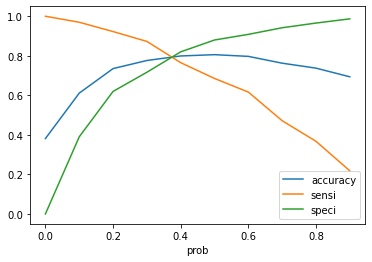

In [112]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [113]:
# Calculating the final_predicted values with cut-off value as 0.35
y_train_pred_final['final_predicted'] = y_train_pred_final.Conv_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Conv,Conv_Prob,ConvID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.336431,1871,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.213790,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.383210,3516,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.852171,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.336431,3934,0,1,1,1,1,0,0,0,0,0,0,0


In [114]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Conv, y_train_pred_final.final_predicted)

0.7937538651824366

In [115]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Conv, y_train_pred_final.final_predicted )
confusion2

array([[3148,  854],
       [ 480, 1986]])

In [116]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [117]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.805352798053528

In [118]:
# Let us calculate specificity
TN / float(TN+FP)

0.7866066966516742

In [119]:
# Calculating the Lead Score
y_train_pred_final['Lead Score'] = y_train_pred_final['Conv_Prob']*100

In [120]:
y_train_pred_final_score = y_train_pred_final[['ConvID', 'Conv', 'Conv_Prob', 'final_predicted', 'Lead Score']]

In [121]:
y_train_pred_final_score.head()

,ConvID,Conv,Conv_Prob,final_predicted,Lead Score
0,1871,0,0.336431,0,33.643145
1,6795,0,0.213790,0,21.379045
2,3516,0,0.383210,1,38.320955
3,8105,0,0.852171,1,85.217095
4,3934,0,0.336431,0,33.643145


In [122]:
# Getting the Lead Score for the Conv_Prob
y_train_pred_final_score.loc[y_train_pred_final_score['Lead Score'] > 0, :]

,ConvID,Conv,Conv_Prob,final_predicted,Lead Score
0,1871,0,0.336431,0,33.643145
1,6795,0,0.213790,0,21.379045
2,3516,0,0.383210,1,38.320955
3,8105,0,0.852171,1,85.217095
4,3934,0,0.336431,0,33.643145
...,...,...,...,...,...
6463,350,1,0.151804,0,15.180414
6464,79,1,0.947941,1,94.794147
6465,8039,1,0.336431,0,33.643145
6466,6936,0,0.124955,0,12.495545


### Making predictions on the test set

In [123]:
# Scaling X_test
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [124]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Specialization_Finance Management,Specialization_Hospitality Management,What is your current occupation_Other,What is your current occupation_Unemployed,Last Activity_Email Opened,Last Activity_Others,Last Activity_SMS Sent,Last Activity_Unreachable
4269,0.933036,1,0,0,0,0,0,0,0,0,0,0,1,0
2376,-0.900812,0,0,0,0,1,0,0,0,1,0,0,1,0
7766,-0.793792,0,1,0,0,0,0,0,1,0,0,0,0,1
9199,-0.900812,0,0,1,0,0,0,0,0,1,0,0,0,0
4359,-0.900812,0,0,0,0,1,0,0,0,1,1,0,0,0


In [125]:
# Adding constant
X_test_sm = sm.add_constant(X_test)

In [126]:
# Getting predicted values on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

4269    0.385688
2376    0.928067
7766    0.446297
9199    0.092290
4359    0.809082
9186    0.631849
1631    0.607215
8963    0.226676
8007    0.059130
5324    0.420872
dtype: float64

In [127]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [128]:
# Checking the data of y_pred_1
y_pred_1.head()

,0
4269,0.385688
2376,0.928067
7766,0.446297
9199,0.092290
4359,0.809082


In [129]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [130]:
# Putting CustID to index
y_test_df['ConvID'] = y_test_df.index

In [131]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [132]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [133]:
y_pred_final.head()

,Converted,ConvID,0
0,1,4269,0.385688
1,1,2376,0.928067
2,1,7766,0.446297
3,0,9199,0.092290
4,1,4359,0.809082


In [134]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conv_Prob'})

In [135]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['ConvID','Converted','Conv_Prob'], axis=1)

In [136]:
# Checking the data for y_pred_final
y_pred_final.head()

,ConvID,Converted,Conv_Prob
0,4269,1,0.385688
1,2376,1,0.928067
2,7766,1,0.446297
3,9199,0,0.092290
4,4359,1,0.809082


In [137]:
y_pred_final['final_predicted'] = y_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [138]:
y_pred_final.head()

,ConvID,Converted,Conv_Prob,final_predicted
0,4269,1,0.385688,1
1,2376,1,0.928067,1
2,7766,1,0.446297,1
3,9199,0,0.092290,0
4,4359,1,0.809082,1


In [139]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7914862914862915

In [140]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted)
confusion2

array([[1326,  351],
       [ 227,  868]])

In [141]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [142]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7926940639269406

In [143]:
# Let us calculate specificity
TN / float(TN+FP)

0.7906976744186046

#### Adding Lead Score to the final predicted values

In [144]:
y_pred_final['Lead Score'] = round((y_pred_final['Conv_Prob'] * 100),2)

In [145]:
y_pred_final.head()

,ConvID,Converted,Conv_Prob,final_predicted,Lead Score
0,4269,1,0.385688,1,38.57
1,2376,1,0.928067,1,92.81
2,7766,1,0.446297,1,44.63
3,9199,0,0.092290,0,9.23
4,4359,1,0.809082,1,80.91


In [146]:
y_pred_final.loc[y_pred_final['Lead Score'] > 0, :]

,ConvID,Converted,Conv_Prob,final_predicted,Lead Score
0,4269,1,0.385688,1,38.57
1,2376,1,0.928067,1,92.81
2,7766,1,0.446297,1,44.63
3,9199,0,0.092290,0,9.23
4,4359,1,0.809082,1,80.91
...,...,...,...,...,...
2767,8649,0,0.025786,0,2.58
2768,2152,1,0.349011,0,34.90
2769,7101,0,0.332828,0,33.28
2770,5331,0,0.244899,0,24.49


## 5. Results

From the above analysis and model building, we can see that for the Train set, the sensitivity of the model turned out to be approximately 81% and for test set, it is around 80%. The target Lead conversion rate of a ball park range of around 80% is achieved.

Out of all attributes of leads data, the major attributes which we need to target to assign the lead score, based on our model are:
- Total Time Spent on Website: Person who are spending more time on the website are more probable to be genuine leads who can convert
- Lead Source: With lead source as Direct Traffic, Google, Olark Chat and Organic Search are not potential for taking the education program but source who are coming with reference are needs to be targeted more.
- What is your current occupation: This is very important factor for deciding lead score, person who are unemployed along with working professionals and student are likely to convert and join the courses offered
- Last Activity: This also will help us deciding the lead score as person who has email opened and sms sent can be used for assigning the lead score.
- Specialization: This also help in deciding the lead score. Based on our model, people with hospitality management are less likely to be potential leads and people from Finance Management are likely to be potential leads.

The Lead Score is calculated based on the converted probabilities and based on these lead scores, the CEO can make decisions along with the Sales representatives on which leads to concentrate more.